# Data Loading

In [23]:
!gdown --id 1q_PIiheAe15ZRqABuoE5Dqc9yItmvuY3

Downloading...
From: https://drive.google.com/uc?id=1q_PIiheAe15ZRqABuoE5Dqc9yItmvuY3
To: /content/data.csv
100% 76.9k/76.9k [00:00<00:00, 67.7MB/s]


In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

In [25]:
df = pd.read_csv('data.csv')

# Now you are ready to use the data as following

In [26]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,250000


In [27]:
df = df.drop("Unnamed: 0" , axis=1)

In [28]:
#no duplicates found
df.drop_duplicates()
df.shape

(1460, 11)

In [29]:
df.isna()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,False


In [30]:
#checking for null values 
print(df.Alley.unique())
print(df.Alley.mode())

[nan 'Grvl' 'Pave']
0    Grvl
dtype: object


In [31]:
#replacing null values with mode
df.Alley.fillna('Grvl',inplace=True)

In [32]:
#double check
df.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,False


In [33]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [34]:
#checking for unique values to know whether to drop column or not
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [35]:
df.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [36]:
df.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

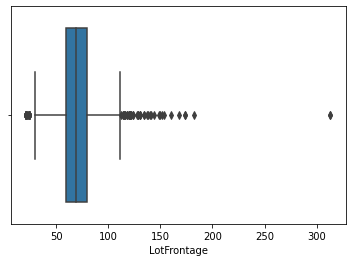

In [37]:
sns.boxplot(data=df, x="LotFrontage")

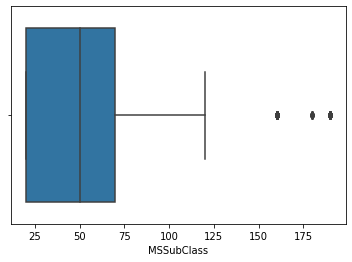

In [42]:
sns.boxplot(data=df, x="MSSubClass")

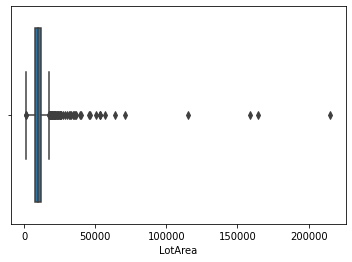

In [43]:
sns.boxplot(data=df, x="LotArea")

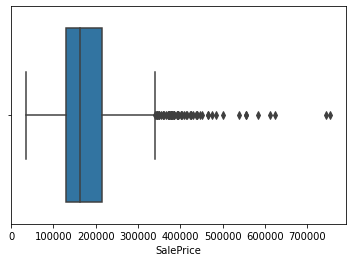

In [44]:
sns.boxplot(data=df, x="SalePrice")

In [38]:
def fix_outliers(df_, colName):
  q1 = df_[colName].quantile(0.25)
  q3 = df_[colName].quantile(0.75)
  range = q3-q1
  whisker_upper = q3+1.5*range
  whisker_lower = q1-1.5*range
  df_[colName] = np.where(df_[colName]>whisker_upper, whisker_upper, np.where(df_[colName]<whisker_lower, whisker_lower, df_[colName]))
  return df_

In [39]:
df=fix_outliers(df, "LotFrontage")

In [45]:
df=fix_outliers(df, "MSSubClass")

In [46]:
df=fix_outliers(df, "LotArea")

In [47]:
df=fix_outliers(df, "SalePrice")

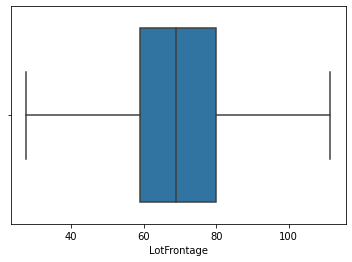

In [40]:
sns.boxplot(data=df, x="LotFrontage")

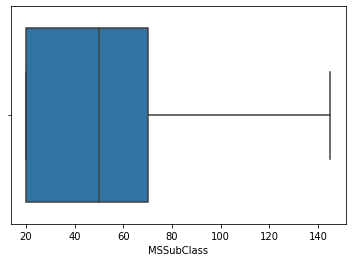

In [48]:
sns.boxplot(data=df, x="MSSubClass")

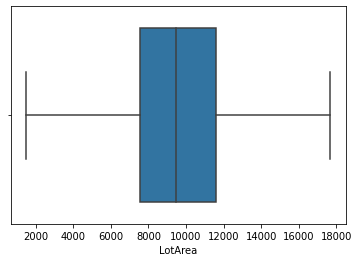

In [49]:
sns.boxplot(data=df, x="LotArea")

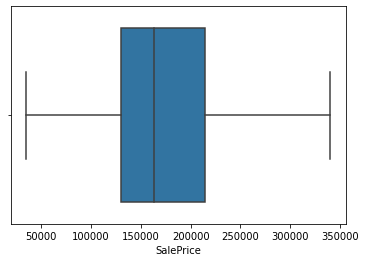

In [50]:
sns.boxplot(data=df, x="SalePrice")

In [41]:
#data successfully cleaned yay